In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('monthly-car-sales.csv')
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [4]:
df.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


In [5]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

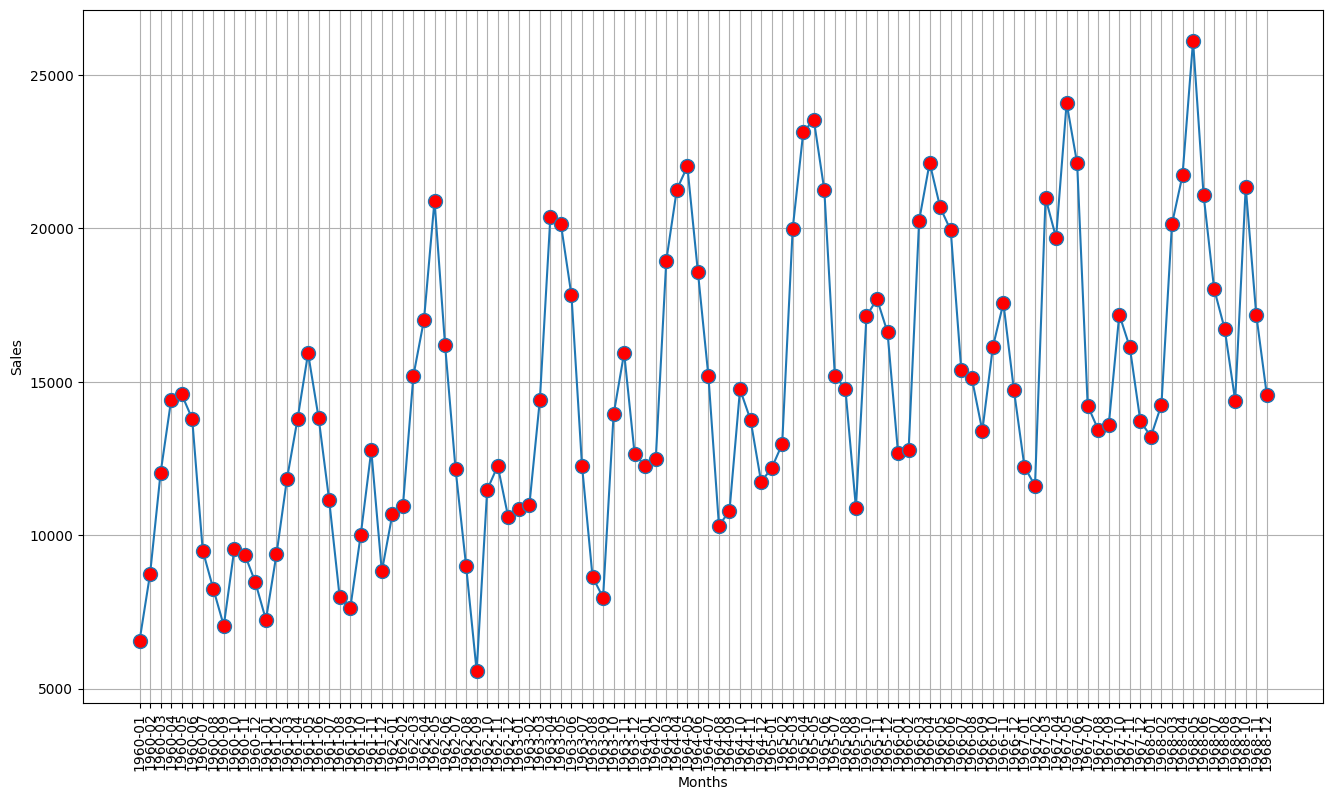

In [6]:
plt.figure(figsize = (16,9))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical')
plt.plot(df['Month'], df['Sales'], marker = 'o', mfc = 'r', ms = 10)
plt.grid()

In [7]:
df.columns = ['ds','y']
df

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [8]:
df["ds"]=pd.to_datetime(df["ds"])

In [9]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [10]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [11]:
import time
time.time()

1714134317.4626706

In [12]:
current_time = time.time()
print("current_time: ", current_time)

current_time:  1714134317.4670515


In [13]:
time.asctime()

'Fri Apr 26 17:55:17 2024'

In [14]:
time.localtime()

time.struct_time(tm_year=2024, tm_mon=4, tm_mday=26, tm_hour=17, tm_min=55, tm_sec=17, tm_wday=4, tm_yday=117, tm_isdst=0)

In [15]:
df.iloc[2,0]

Timestamp('1960-03-01 00:00:00')

In [16]:
time.ctime()

'Fri Apr 26 17:55:17 2024'

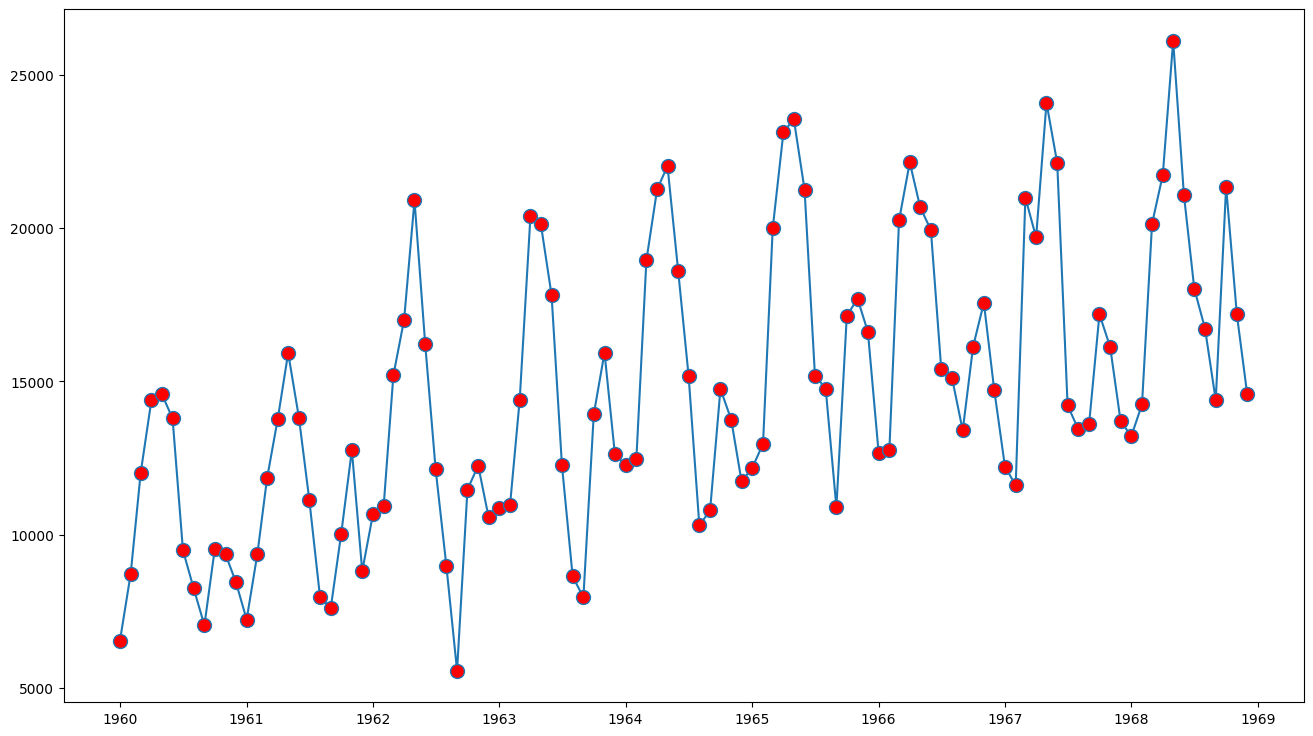

In [17]:
plt.figure(figsize = (16,9))
plt.grid()

plt.scatter(df['ds'], df['y'], color = 'r')
plt.plot(df['ds'], df['y'], marker = 'o', mfc = 'r', ms = 10)
plt.grid()

In [18]:
from prophet import Prophet

In [19]:
model = Prophet(weekly_seasonality = True,
               daily_seasonality = True)

In [20]:
model.fit(df)

17:55:18 - cmdstanpy - INFO - Chain [1] start processing
17:55:18 - cmdstanpy - INFO - Chain [1] done processing


### future

In [36]:
future = list()
for i in range(1,13):
    date = '1969-%02d' % i
    future.append([date])
    
    
for i in range(1,13):
    date = '1970-%02d' % i
    future.append([date])
    
for i in range(1,13):
    date = '1971-%02d' % i
    future.append([date])

In [37]:
future

[['1969-01'],
 ['1969-02'],
 ['1969-03'],
 ['1969-04'],
 ['1969-05'],
 ['1969-06'],
 ['1969-07'],
 ['1969-08'],
 ['1969-09'],
 ['1969-10'],
 ['1969-11'],
 ['1969-12'],
 ['1970-01'],
 ['1970-02'],
 ['1970-03'],
 ['1970-04'],
 ['1970-05'],
 ['1970-06'],
 ['1970-07'],
 ['1970-08'],
 ['1970-09'],
 ['1970-10'],
 ['1970-11'],
 ['1970-12'],
 ['1971-01'],
 ['1971-02'],
 ['1971-03'],
 ['1971-04'],
 ['1971-05'],
 ['1971-06'],
 ['1971-07'],
 ['1971-08'],
 ['1971-09'],
 ['1971-10'],
 ['1971-11'],
 ['1971-12']]

In [38]:
future = pd.DataFrame(future,columns=['ds'])

In [39]:
future

,ds
0,1969-01
1,1969-02
2,1969-03
3,1969-04
4,1969-05
5,1969-06
6,1969-07
7,1969-08
8,1969-09
9,1969-10


In [40]:
forecast = model.predict(future)

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,16076.662636,14608.244420,17520.514886,16076.470095,16076.846642,-37.390946,-37.390946,-37.390946,2481.534678,...,291.115404,291.115404,291.115404,-2810.041029,-2810.041029,-2810.041029,0.0,0.0,0.0,16039.271690
1,1969-02-01,16134.855576,13358.412525,16484.796734,16133.565936,16135.922209,-1206.698236,-1206.698236,-1206.698236,2481.534678,...,-894.970832,-894.970832,-894.970832,-2793.262082,-2793.262082,-2793.262082,0.0,0.0,0.0,14928.157340
2,1969-03-01,16187.416940,18911.532336,21911.809802,16184.519208,16190.254836,4199.133186,4199.133186,4199.133186,2481.534678,...,-894.970832,-894.970832,-894.970832,2612.569340,2612.569340,2612.569340,0.0,0.0,0.0,20386.550127
3,1969-04-01,16245.609880,22518.339924,25480.659548,16240.270520,16250.572466,7813.243058,7813.243058,7813.243058,2481.534678,...,440.372868,440.372868,440.372868,4891.335512,4891.335512,4891.335512,0.0,0.0,0.0,24058.852938
4,1969-05-01,16301.925628,23852.972913,26987.671585,16293.969127,16309.384064,9093.273353,9093.273353,9093.273353,2481.534678,...,270.647674,270.647674,270.647674,6341.091001,6341.091001,6341.091001,0.0,0.0,0.0,25395.198981
5,1969-06-01,16360.118567,20376.831371,23291.769182,16349.277924,16370.361492,5449.276953,5449.276953,5449.276953,2481.534678,...,-494.946881,-494.946881,-494.946881,3462.689155,3462.689155,3462.689155,0.0,0.0,0.0,21809.395521
6,1969-07-01,16416.434315,16962.196931,19880.749207,16402.087309,16430.211560,2074.226403,2074.226403,2074.226403,2481.534678,...,440.372868,440.372868,440.372868,-847.681144,-847.681144,-847.681144,0.0,0.0,0.0,18490.660718
7,1969-08-01,16474.627255,14226.345129,17240.883818,16456.121700,16492.281505,-790.823815,-790.823815,-790.823815,2481.534678,...,-52.091765,-52.091765,-52.091765,-3220.266728,-3220.266728,-3220.266728,0.0,0.0,0.0,15683.803440
8,1969-09-01,16532.820194,13385.947537,16350.670108,16510.637528,16555.269723,-1727.774897,-1727.774897,-1727.774897,2481.534678,...,439.873531,439.873531,439.873531,-4649.183107,-4649.183107,-4649.183107,0.0,0.0,0.0,14805.045298
9,1969-10-01,16589.135942,17605.772105,20753.074697,16562.660812,16615.225751,2606.836487,2606.836487,2606.836487,2481.534678,...,291.115404,291.115404,291.115404,-165.813596,-165.813596,-165.813596,0.0,0.0,0.0,19195.972429


In [42]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,16039.271690,14608.244420,17520.514886
1,1969-02-01,14928.157340,13358.412525,16484.796734
2,1969-03-01,20386.550127,18911.532336,21911.809802
3,1969-04-01,24058.852938,22518.339924,25480.659548
4,1969-05-01,25395.198981,23852.972913,26987.671585
5,1969-06-01,21809.395521,20376.831371,23291.769182
6,1969-07-01,18490.660718,16962.196931,19880.749207
7,1969-08-01,15683.803440,14226.345129,17240.883818
8,1969-09-01,14805.045298,13385.947537,16350.670108
9,1969-10-01,19195.972429,17605.772105,20753.074697


C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


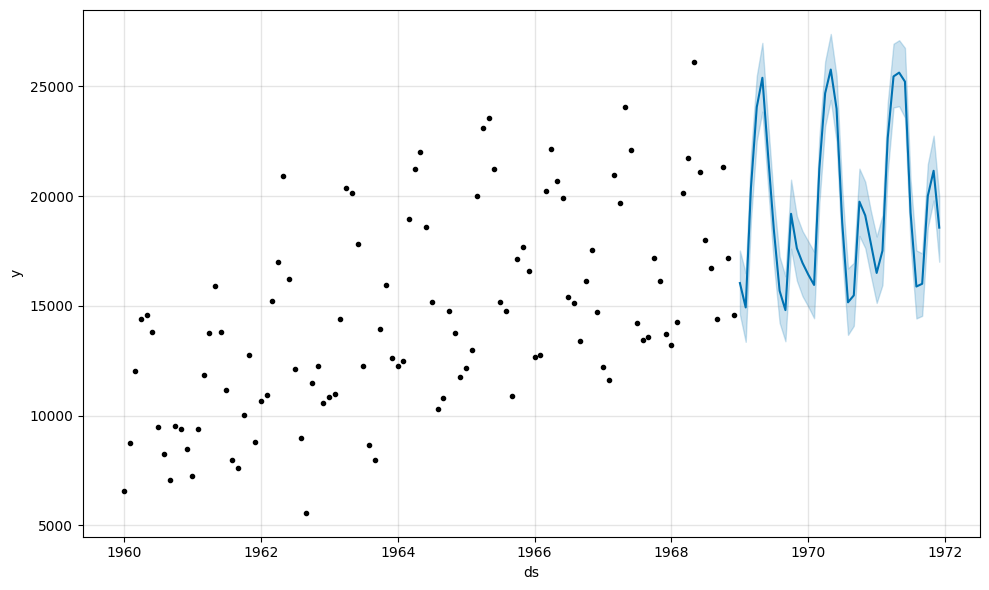

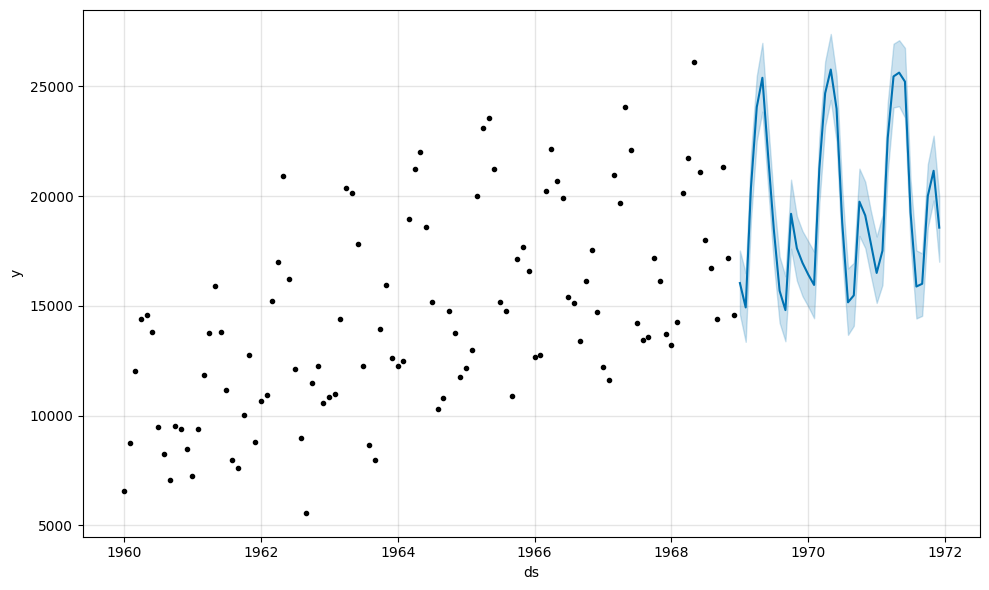

In [43]:
model.plot(forecast)

In [44]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,16076.662636,14608.244420,17520.514886,16076.470095,16076.846642,-37.390946,-37.390946,-37.390946,2481.534678,...,291.115404,291.115404,291.115404,-2810.041029,-2810.041029,-2810.041029,0.0,0.0,0.0,16039.271690
1,1969-02-01,16134.855576,13358.412525,16484.796734,16133.565936,16135.922209,-1206.698236,-1206.698236,-1206.698236,2481.534678,...,-894.970832,-894.970832,-894.970832,-2793.262082,-2793.262082,-2793.262082,0.0,0.0,0.0,14928.157340
2,1969-03-01,16187.416940,18911.532336,21911.809802,16184.519208,16190.254836,4199.133186,4199.133186,4199.133186,2481.534678,...,-894.970832,-894.970832,-894.970832,2612.569340,2612.569340,2612.569340,0.0,0.0,0.0,20386.550127
3,1969-04-01,16245.609880,22518.339924,25480.659548,16240.270520,16250.572466,7813.243058,7813.243058,7813.243058,2481.534678,...,440.372868,440.372868,440.372868,4891.335512,4891.335512,4891.335512,0.0,0.0,0.0,24058.852938
4,1969-05-01,16301.925628,23852.972913,26987.671585,16293.969127,16309.384064,9093.273353,9093.273353,9093.273353,2481.534678,...,270.647674,270.647674,270.647674,6341.091001,6341.091001,6341.091001,0.0,0.0,0.0,25395.198981
5,1969-06-01,16360.118567,20376.831371,23291.769182,16349.277924,16370.361492,5449.276953,5449.276953,5449.276953,2481.534678,...,-494.946881,-494.946881,-494.946881,3462.689155,3462.689155,3462.689155,0.0,0.0,0.0,21809.395521
6,1969-07-01,16416.434315,16962.196931,19880.749207,16402.087309,16430.211560,2074.226403,2074.226403,2074.226403,2481.534678,...,440.372868,440.372868,440.372868,-847.681144,-847.681144,-847.681144,0.0,0.0,0.0,18490.660718
7,1969-08-01,16474.627255,14226.345129,17240.883818,16456.121700,16492.281505,-790.823815,-790.823815,-790.823815,2481.534678,...,-52.091765,-52.091765,-52.091765,-3220.266728,-3220.266728,-3220.266728,0.0,0.0,0.0,15683.803440
8,1969-09-01,16532.820194,13385.947537,16350.670108,16510.637528,16555.269723,-1727.774897,-1727.774897,-1727.774897,2481.534678,...,439.873531,439.873531,439.873531,-4649.183107,-4649.183107,-4649.183107,0.0,0.0,0.0,14805.045298
9,1969-10-01,16589.135942,17605.772105,20753.074697,16562.660812,16615.225751,2606.836487,2606.836487,2606.836487,2481.534678,...,291.115404,291.115404,291.115404,-165.813596,-165.813596,-165.813596,0.0,0.0,0.0,19195.972429


In [53]:
forecast['y']=forecast['yhat_upper']
df_con=pd.concat([df,forecast[["ds","y"]]],names=["ds","y"]) 

In [54]:
df_con.head()

,ds,y
0,1960-01-01,6550.0
1,1960-02-01,8728.0
2,1960-03-01,12026.0
3,1960-04-01,14395.0
4,1960-05-01,14587.0


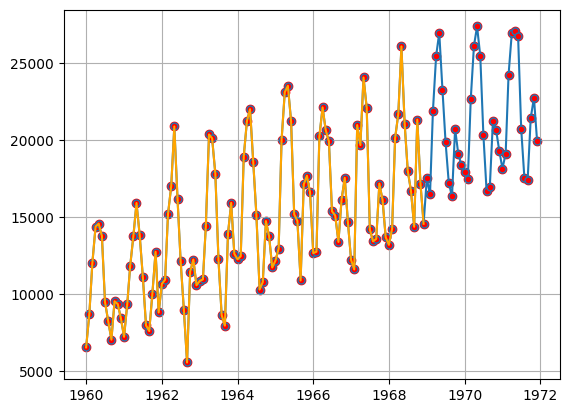

In [61]:
plt.grid()

plt.scatter(df_con['ds'], df_con['y'], color = 'r')
plt.plot(df_con['ds'], df_con['y'], marker = 'o', mfc = 'r', ms = 5)
plt.plot(df['ds'],df['y'],color = 'orange')

In [223]:
df = pd.read_csv("sealevel.csv")
df.head()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


In [224]:
df.columns

Index(['Year', 'TotalWeightedObservations', 'GMSL_noGIA', 'StdDevGMSL_noGIA',
       'SmoothedGSML_noGIA', 'GMSL_GIA', 'StdDevGMSL_GIA', 'SmoothedGSML_GIA',
       'SmoothedGSML_GIA_sigremoved'],
      dtype='object')

In [225]:
df.isnull().sum()

Year                           0
TotalWeightedObservations      0
GMSL_noGIA                     0
StdDevGMSL_noGIA               0
SmoothedGSML_noGIA             0
GMSL_GIA                       0
StdDevGMSL_GIA                 0
SmoothedGSML_GIA               0
SmoothedGSML_GIA_sigremoved    0
dtype: int64

In [226]:
model = Prophet(weekly_seasonality = True )

In [227]:
df = df.groupby(['Year']).mean()

In [228]:
df.head()

,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
Year,,,,,,,,
1993,319044.908649,-34.605405,87.603784,-34.629459,-34.483784,87.607027,-34.507568,-34.508378
1994,323836.882162,-30.951081,87.412432,-30.898919,-30.584324,87.418919,-30.532432,-30.531892
1995,317986.154865,-28.645946,85.336757,-27.971351,-28.019459,85.337838,-27.359189,-27.358108
1996,323979.240278,-26.596389,84.194444,-26.140833,-25.744167,84.188611,-25.288611,-25.287222
1997,321345.634054,-22.682432,97.989189,-22.345946,-21.591081,98.000000,-21.254865,-21.255676


In [229]:
df['ds']=pd.to_datetime(df.index,format="%Y")

In [230]:
df['y']=df.GMSL_noGIA

In [232]:
model.fit(df[['ds','y']])

19:21:16 - cmdstanpy - INFO - Chain [1] start processing
19:21:16 - cmdstanpy - INFO - Chain [1] done processing


In [233]:
list1 = []
for i in range(9):
    list1.append(2021+i)

print(list1)

[2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029]


In [234]:
list1 = pd.DataFrame({"ds":list1})

In [235]:
forecast = model.predict(list1)

In [236]:
forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,92.673459,44.781949,53.764224,92.673459,92.673459,-43.409361,-43.409361,-43.409361,91.467478,...,0.122514,0.122514,0.122514,-134.999353,-134.999353,-134.999353,0.0,0.0,0.0,49.264098
1,2022-01-01,95.777996,45.690240,54.639624,95.777674,95.778323,-45.613280,-45.613280,-45.613280,91.467478,...,-1.737257,-1.737257,-1.737257,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,50.164716
2,2023-01-01,98.882534,50.754314,59.830573,98.881489,98.883578,-43.419752,-43.419752,-43.419752,91.467478,...,0.520306,0.520306,0.520306,-135.407536,-135.407536,-135.407536,0.0,0.0,0.0,55.462782
3,2024-01-01,101.987071,54.064916,62.911765,101.985030,101.989066,-43.505970,-43.505970,-43.505970,91.467478,...,0.217960,0.217960,0.217960,-135.191407,-135.191407,-135.191407,0.0,0.0,0.0,58.481102
4,2025-01-01,105.100114,58.439700,67.506263,105.096826,105.103279,-42.248919,-42.248919,-42.248919,91.467478,...,1.282956,1.282956,1.282956,-134.999353,-134.999353,-134.999353,0.0,0.0,0.0,62.851195
5,2026-01-01,108.204652,59.829860,68.572748,108.200022,108.209299,-44.180646,-44.180646,-44.180646,91.467478,...,-0.304622,-0.304622,-0.304622,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,64.024006
6,2027-01-01,111.309189,63.049392,72.233892,111.303171,111.315271,-43.817544,-43.817544,-43.817544,91.467478,...,0.122514,0.122514,0.122514,-135.407536,-135.407536,-135.407536,0.0,0.0,0.0,67.491645
7,2028-01-01,114.413727,64.422095,73.320742,114.406047,114.421166,-45.461186,-45.461186,-45.461186,91.467478,...,-1.737257,-1.737257,-1.737257,-135.191407,-135.191407,-135.191407,0.0,0.0,0.0,68.952540
8,2029-01-01,117.526770,69.392043,78.349256,117.517179,117.536011,-43.313915,-43.313915,-43.313915,91.467478,...,0.217960,0.217960,0.217960,-134.999353,-134.999353,-134.999353,0.0,0.0,0.0,74.212855


In [237]:
forecast['y']=forecast['yhat']
df_con=pd.concat([df,forecast[["ds","y"]]],names=[["ds","y"]]) 

In [238]:
df_con.head()


,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved,ds,y
1993,319044.908649,-34.605405,87.603784,-34.629459,-34.483784,87.607027,-34.507568,-34.508378,1993-01-01,-34.605405
1994,323836.882162,-30.951081,87.412432,-30.898919,-30.584324,87.418919,-30.532432,-30.531892,1994-01-01,-30.951081
1995,317986.154865,-28.645946,85.336757,-27.971351,-28.019459,85.337838,-27.359189,-27.358108,1995-01-01,-28.645946
1996,323979.240278,-26.596389,84.194444,-26.140833,-25.744167,84.188611,-25.288611,-25.287222,1996-01-01,-26.596389
1997,321345.634054,-22.682432,97.989189,-22.345946,-21.591081,98.000000,-21.254865,-21.255676,1997-01-01,-22.682432


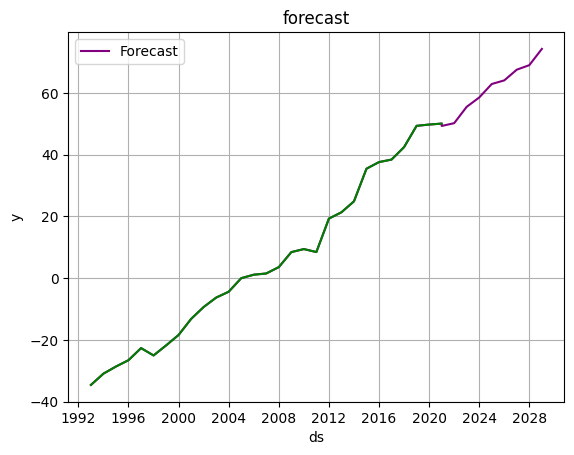

In [252]:
plt.plot(df_con['ds'],df_con['y'],c="purple");
plt.plot(df['ds'],df[['y']],c='green');

plt.title('forecast')  
plt.xlabel('ds')  
plt.ylabel('y') 
plt.grid(True)  
plt.legend(['Forecast']) 

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


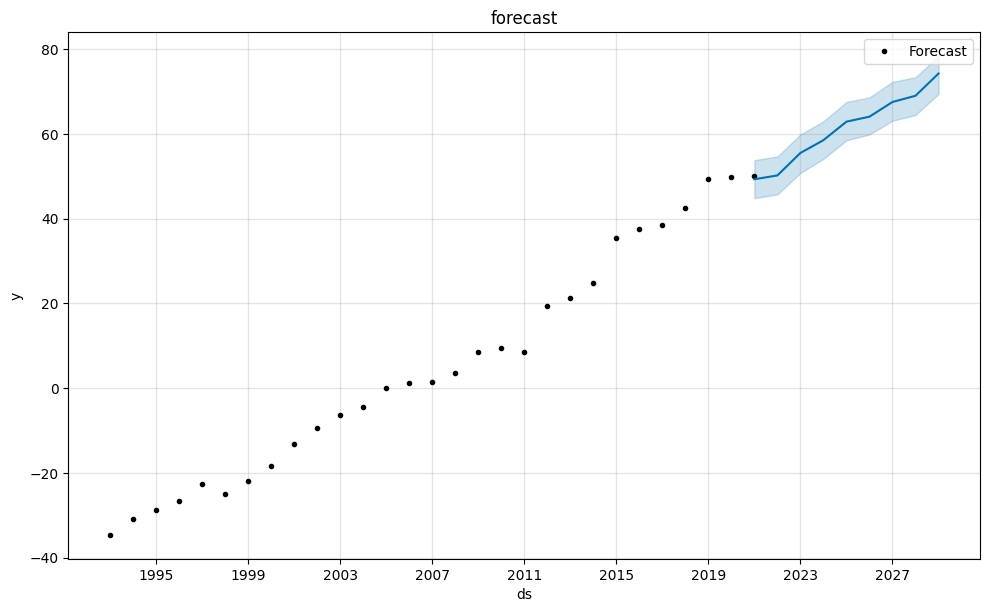

In [247]:
model.plot(forecast)

plt.title('forecast')  
plt.xlabel('ds')  
plt.ylabel('y') 
plt.grid(True)  
plt.legend(['Forecast']) 

plt.show() 
